In [1]:
from app.dataManager import *
import math
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.30/02


In [2]:
def valid_sample_condition(name):
    return 'Showering' not in name and 'Sub-GeV' not in name and 'pi^{0}' not in name

def get_counts(ana_master):
    tot_counts = []
    for i in range(len(ana_master.samples)):
        s = ana_master.samples[i]
        if valid_sample_condition(s.name):
            tot_counts += list(get_counts_from_hist(ana_master.samples[i].data_hist))
    return tot_counts

In [3]:
# the dataset does not matter as we are going to print the oscillation probability without doing anything with the samples...

tag = 'A'
binning_file= '../fake_data/FDS_'+tag+'/binning.txt'
data_folder = '../fake_data/FDS_'+tag+'/unoscillated/'
tag = 'FDS_'+tag
nominal = AnaMaster(data_folder=data_folder, binning_file=binning_file, scale_to_HK=True)
test = AnaMaster(data_folder=data_folder, binning_file=binning_file, scale_to_HK=True)

change_type:  None
Reaction Name: MCNumuBar
Reaction Name: MCNutau
Reaction Name: MCNC
Reaction Name: MCNue
Reaction Name: MCNumu
Reaction Name: MCNueBar
Reaction Name: MCTotal
{'Sub-GeV  e-like 0 d.e.*': 2805.4999999999995, 'Sub-GeV  e-like 1 d.e.*': 2805.4999999999995, '1-ring #pi^{0}-like': 6510.9, 'Sub-GeV #mu-like 0 d.e.*': 2805.4999999999995, 'Sub-GeV #mu-like 1 d.e.*': 2805.4999999999995, 'Sub-GeV #mu-like 2 d.e.*': 2805.4999999999995, '2-ring #pi^{0}-like': 6510.9, 'Multi-GeV #nu_{e}-like*': 2805.4999999999995, 'Multi-GeV #bar{#nu}_{e}-like*': 2805.4999999999995, 'Multi-GeV #mu-like*': 2805.4999999999995, 'Multi-GeV Multi-Ring #nu_{e}-like': 6510.9, 'Multi-GeV Multi-Ring #bar{#nu}_{e}-like': 6510.9, 'Multi-GeV Multi-Ring #mu-like': 6510.9, 'Multi-GeV Multi-Ring  Other': 6510.9, 'PC  Stopping': 6510.9, 'PC  Through-going': 6510.9, 'Up-#mu Stopping': 6510.9, 'Up-#mu Non-Showering': 6510.9, 'Up-#mu Showering': 6510.9, 'Sub-GeV #nu_{e}-like': 3705.4, 'Sub-GeV #bar{#nu}_{e}-like 0 n

Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 0 d.e.*  MCNC (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 0 d.e.*  MCNutau (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 0 d.e.*  MCNumuBar (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 0 d.e.*  MCNumu (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 0 d.e.*  MCNueBar (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 0 d.e.*  MCNue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 0 d.e.*Data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 1 d.e.*  MCNC (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 1 d.e.*  MCNutau (Potential memory leak).
Warning in <TROOT::Ap

change_type:  IM
['OC', 'OM']
0.0008554860000181036 (0.8562499999999991, 0.7124999999999986)
0.0008554860000181036 0.0005515398146436988
Success:  True
{'IM': 1.2, 'OC': 0.8562499999999991, 'IC': 0.8562499999999991, 'OM': 0.7124999999999986}
OC_IM
IM_OM


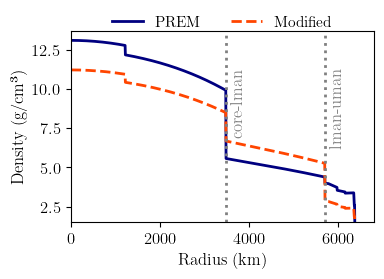

Loading Density profile from: /Users/cjesus/Documents/HKnuTomo/output/osc/TEMP_PREM.dat


In [8]:
test.OscProb.set_Earth_model('IM', 1.2)
print(test.OscProb._earth.layer_factors)
test.OscProb._earth.plot_improved_density_profiles(figname='EarthModification_IM_1.2.pdf', h_factor=0.82, use_legend=True)

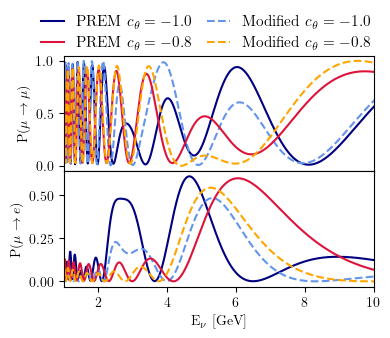

In [5]:
import matplotlib.pyplot as plt
import numpy as np

nu = 1  # neutrino

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 3), sharex=True)

c1 = 'r'
c2 = 'b'



colors = ['navy', 'orangered', 'cornflowerblue', 'deeppink']

colors = ['navy', 'cornflowerblue', 'crimson', 'orange']

x = np.linspace(0.5, 11, 1000)

lines_prem = []
lines_mod = []

cnt = 0
for ax, (alpha, beta) in [(ax1, (2, 2)), (ax2, (2, 1))]:
    for z in [-1.0, -0.8]:
        y_prem = [nominal.OscProb.get_osc_prob(E_value, z, nu, alpha, beta) for E_value in x]
        y_mod = [test.OscProb.get_osc_prob(E_value, z, nu, alpha, beta) for E_value in x]
        
        label_prem = f'PREM $c_\\theta={z}$'
        label_mod = f'Modified $c_\\theta={z}$'

        line_prem, = ax.plot(x, y_prem, c=colors[cnt%4], linestyle='-', label=label_prem)
        cnt+=1
        line_mod, = ax.plot(x, y_mod, c=colors[cnt%4], linestyle='--', label=label_mod)
        cnt+=1
        #break
        
        
        if ax == ax1:  # Only add to legend once
            lines_prem.append(line_prem)
            lines_mod.append(line_mod)

ax1.set_ylabel('P($\\mu \\rightarrow \\mu)$')
ax2.set_ylabel('P($\\mu \\rightarrow e)$')

# Set common x-axis label and limits
ax2.set_xlabel('E$_\\nu$ [GeV]')
ax1.set_xlim(1, 10)
ax2.set_xlim(1, 10)

# Remove space between panels
plt.subplots_adjust(hspace=0)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12 

# Reorganize legend entries
legend_lines = lines_prem + lines_mod
legend_labels = [l.get_label() for l in lines_prem] + [l.get_label() for l in lines_mod]

# Add a single legend for both panels with reorganized entries
fig.legend(legend_lines, legend_labels, loc='upper center', bbox_to_anchor=(0.48, 1.06), 
           ncol=2, fontsize=11, frameon=False, handlelength=1.5, columnspacing=1)

plt.savefig('OscProb_IM_1.2.pdf', bbox_inches='tight')

# In case you want to look into it for an unphysical Earth Model

In [6]:
from wrapper_Prob3 import BargerPropagator
test.OscProb._earth.change_layer_density('OC', 0.9)
test.OscProb._earth.change_layer_density('IM', 1)
test.OscProb._earth.change_layer_density('OM', 1.2)
test.OscProb._earth.evaluate_modified_density()
np.savetxt(f'{test.OscProb._outdir}/TEMP_PREM.dat', test.OscProb._earth.mod_PREM, fmt='%.3f', delimiter='\t')
test.OscProb.bp_true = BargerPropagator.PyBargerPropagator(f'{test.OscProb._outdir}/TEMP_PREM.dat')

Loading Density profile from: /Users/cjesus/Documents/HKnuTomo/output/osc/TEMP_PREM.dat


OC_IM
IM_OM


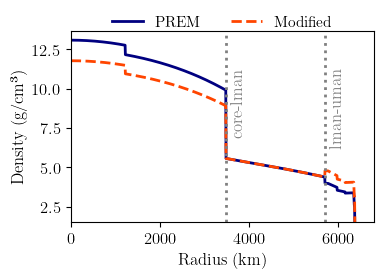

In [7]:
test.OscProb._earth.plot_improved_density_profiles(figname=None, h_factor=0.82, use_legend=True)